# Flow of the project   

***(a)  Webscrapping of Data from Amazon Website***    

***(b)  Preparation of Data set***     

***(c)  Sentiment Analysis***    

        (i)  By using Star ratings.  
        
        (ii) By using Libraries - based on Reviews.  
        
        (iii) Comparison of Review Sentiment and Rating Sentiment.  
        
***(d)  Pre-processing of reviews for analysis using ML models.***  

***(e)  Splitting data into Training and Testing data.***   
 
***(f)  Using Review sentiment on various ML models.***  
        
        (i) Comparison of Testing and Training accuracy of various ML models.   
        
        (ii) Use of Tensor flow.  

***(g)  Using Rating sentiment on various ML models.***
        
        (i) Comparison of Testing and Training accuracy of various ML models.   
        
        (ii) Use of Tensor flow.  
        
***(h)  Conclusion***


# Aim of the project

   ***To obtain Mobile phones related data from an E-market website (amazon) and provide various inferences to the data collected as illustrated in subsequent paras.*** 


## Methodolgy chosen by the group for data collection

   ***(a) Group studied various models to collect data from Amzon website and went to scrap data from 
     amazon india website***.
   
   ***(b) Webscrapping has been carried using Beautiful Soup package and further the scrapped data has been imported 
     into respective CSV files. The CSV files obtained has been used in this project.*** 


## Aims achieved during the execution of the project

***(a) Dataset has been preprocessed for further inferences using various libraries to include NLTK.***

***(b) Best phone brands to purchase have been identified.***
   
***(c) Best Time of the year to purchase the Phone from the brand has also been identified.***
   
***(c) Most of the libraries have been put to use.*** 
   
***(d) ML algortihms have been applied on the dataset and best suited ML algorithm for the data has been identified.***
   
***(e) ML algorithms have been applied both on Star Ratings as well as Reviews rating given by the customers.***
   
***(f) An accuracy of more than 90% has been achieved for Star Ratings and Review rating Analysis.***

# Data extraction through Webscrapping

In [ ]:
import urllib.request as url
from bs4 import BeautifulSoup as bs
import time
import re
import pandas as pd
import requests

In [ ]:
base_review_url = "https://www.amazon.in/Redmi-Sporty-Orange-64GB-Storage/product-reviews/B08696W3B3?reviewerType=all_reviews&pageNumber="

In [ ]:
def amazon_reviews_extraction(url_type,base_review_url):
    total_reviews = 2000
    i = 0
    final_reviews = []
    final_votes = []
    final_dates = []
    final_comments = []
    final_ratings= []
    while i<total_reviews:
        time.sleep(30)
        base_review_url = re.sub(r"url\_type",url_type,base_review_url)
        page = requests.get(base_review_url+str(i))
        html = page.text
        soup = bs(html, 'html.parser')
        reviews = [review.text for review in soup.findAll('span',{'class':"a-size-base review-text review-text-content",'data-hook':"review-body"})]
        votes = [f.text for f in soup.findAll('span',{'data-hook':'helpful-vote-statement'})]
        dates = [day.text for day in soup.findAll('span',{'class':"a-size-base a-color-secondary review-date",'data-hook':"review-date"})]
        comments = [c.text for c in soup.findAll('span',{'class':"review-comment-total aok-hidden"})]
        ratings = [r.text for r in soup.findAll('i',{'data-hook':'review-star-rating'})]
        final_reviews,final_votes,final_dates = final_reviews+reviews,final_votes+votes,final_dates+dates
        final_comments,final_ratings = final_comments+comments,final_ratings+ratings
        i = i+1
        if len(final_reviews)==total_reviews:
            i = total_reviews
    return pd.DataFrame([final_reviews,final_votes,final_dates,final_comments,final_ratings]).T
amazon_redmi_reviews_data = amazon_reviews_extraction("positive",base_review_url)
amazon_redmi_reviews_data.to_csv("Redmi_reviews.csv",index=False)

In [10]:
df=pd.read_csv('Redmi_reviews.csv')
df.head()

,Unnamed: 0,0,1,2,3,4
0,0,"\n\n Processor is bit slow, camera is below a...",72 people found this helpful,Reviewed in India on 11 September 2020,NaN,3.0 out of 5 stars
1,1,\n\n Overall its good and satisfied for the p...,58 people found this helpful,Reviewed in India on 15 September 2020,NaN,4.0 out of 5 stars
2,2,\n\n Very very Poor Mobile. If you have used ...,54 people found this helpful,Reviewed in India on 18 September 2020,NaN,1.0 out of 5 stars
3,3,\n\n best good product prive battry camera al...,56 people found this helpful,Reviewed in India on 3 September 2020,NaN,5.0 out of 5 stars
4,4,\n\n\n Your browser does not support HTML5 vi...,37 people found this helpful,Reviewed in India on 12 September 2020,NaN,1.0 out of 5 stars


## CSV files have been created for various brands in a similar process for further analysis.

In [1]:
# Following libraries have been used in the project. Few additional libraries have been imported as per requirement.
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

#  Preparation of Data set 

In [2]:
# Webscrapped CSV files have been imported and concatenated as below

amazon_phone = ['iphone.csv','1plus.csv', 'Redmi.csv','samsung.csv']
data = pd.concat([pd.read_csv(f,header=None) for f in amazon_phone])
data.head()

,0,1,2
0,iphone,Please do not buy expensive product like iphon...,1.0 out of 5 stars
1,iphone,Bought the mobile from appario retail ltd. Mob...,1.0 out of 5 stars
2,iphone,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0 out of 5 stars
3,iphone,The iPhone design is good and the camera quali...,5.0 out of 5 stars
4,iphone,My Phone is Producing Too Much Heat Even Didn’...,1.0 out of 5 stars


In [3]:
data.shape

(18136, 3)

In [4]:
data.to_csv('amazon_reviews.csv',index=False)
data = pd.read_csv('amazon_reviews.csv')
data.head()


,0,1,2
0,iphone,Please do not buy expensive product like iphon...,1.0 out of 5 stars
1,iphone,Bought the mobile from appario retail ltd. Mob...,1.0 out of 5 stars
2,iphone,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0 out of 5 stars
3,iphone,The iPhone design is good and the camera quali...,5.0 out of 5 stars
4,iphone,My Phone is Producing Too Much Heat Even Didn’...,1.0 out of 5 stars


In [5]:
data = pd.read_csv("amazon_reviews.csv", names=['Brand', 'Reviews', 'Ratings'])
data.head()

,Brand,Reviews,Ratings
0,0,1,2
1,iphone,Please do not buy expensive product like iphon...,1.0 out of 5 stars
2,iphone,Bought the mobile from appario retail ltd. Mob...,1.0 out of 5 stars
3,iphone,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0 out of 5 stars
4,iphone,The iPhone design is good and the camera quali...,5.0 out of 5 stars


In [6]:
data = data.iloc[1:] # first row has been removed
data.head()

,Brand,Reviews,Ratings
1,iphone,Please do not buy expensive product like iphon...,1.0 out of 5 stars
2,iphone,Bought the mobile from appario retail ltd. Mob...,1.0 out of 5 stars
3,iphone,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0 out of 5 stars
4,iphone,The iPhone design is good and the camera quali...,5.0 out of 5 stars
5,iphone,My Phone is Producing Too Much Heat Even Didn’...,1.0 out of 5 stars


## Heatmap plotted to understand the null values in the data set 


<AxesSubplot:>

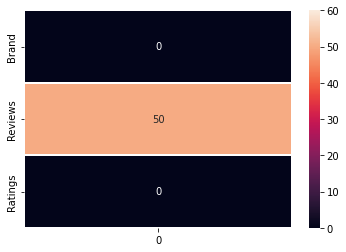

In [7]:
data.isnull().sum()
null_data = pd.DataFrame(data.isnull().sum())
sns.heatmap(null_data, vmax=60, linewidths=0.03, annot=True, fmt='d')

###  Removing Null values 

In [8]:
data_new = data.copy()
data_new = data_new.dropna()
data_new.isnull().sum()

Brand      0
Reviews    0
Ratings    0
dtype: int64

In [9]:
# Conversion of string to int for ratings obtained
data_new['stars'] = pd.to_numeric(data_new['Ratings'].apply(lambda x: x[:3])).astype(int)
data_new.head()

,Brand,Reviews,Ratings,stars
1,iphone,Please do not buy expensive product like iphon...,1.0 out of 5 stars,1
2,iphone,Bought the mobile from appario retail ltd. Mob...,1.0 out of 5 stars,1
3,iphone,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0 out of 5 stars,5
4,iphone,The iPhone design is good and the camera quali...,5.0 out of 5 stars,5
5,iphone,My Phone is Producing Too Much Heat Even Didn’...,1.0 out of 5 stars,1


In [10]:
#  Counts of respective star ratings
data_new['stars'].value_counts()

5    6930
1    4808
4    3154
3    1909
2    1285
Name: stars, dtype: int64

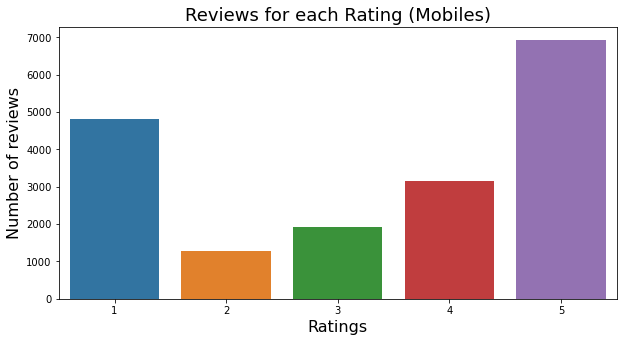

In [11]:
# Countplot for various mobiles Ratings in the dataset 
plt.figure(figsize=(10,5))
sns.countplot(x="stars", data=data_new)
plt.title("Reviews for each Rating (Mobiles)", size=18)
plt.xlabel('Ratings',fontdict={'size': 16})
plt.ylabel('Number of reviews',fontdict={'size': 16})
plt.show()


#                                         Sentiment Analysis

   ***(a) The group carried out sentiment analysis in the subsequent paras by two methods.*** 
       
       (i) By using Star ratings(Rating sentiment)
       
       (ii) By using Libraries (Review Sentiment)
        
  ***(b) By using Star ratings(Rating sentiment)***
       
       (i) Ratings given by the customers have been converted into int type. Ratings 
       with 4,5 have been considered as positive and ratings with 1,2 have been considered 
       as positive. Ratings with 3 have been conisdered as neutral. 
              
       
  ***(c) By using Libraries (Review sentiment)***    
   
   
       (i) Reviews given by the cusotmers have been analysed using sentiment libraries.A sentiment  
       count has been given to the analysed reviews. Based on the sentiment count, reviews   
       have catagorised into negative and postive.
       
       
  ***(d) Further both review ratings and star rating sentiment analysis have been compared to understand the accuracy.*** 
   

##         Sentiment Analysis by using Star ratings  (Rating sentiment)

In [12]:
def Rating_Sentiment(x):
    if x>3:
        return 'positive'
    if x==3:
        return 'neutral'
    else:
        return 'negative'

In [13]:
s=data_new['stars']
d=list(map(Rating_Sentiment,s))
data_new['Rating_Sentiment']=d

data_new.head()

data_new.shape


(18086, 5)

In [14]:
data_n=data_new.drop_duplicates(keep='first',inplace=False)

data_n.shape



(11678, 5)

In [15]:
data_f = data_n[data_n['stars']!=3]
data_f.shape


(10420, 5)

In [16]:
data_f[data_f['Rating_Sentiment']== 'negative'].shape


(3830, 5)

In [17]:
data_f[data_f['Rating_Sentiment']== 'positive'].shape

(6590, 5)

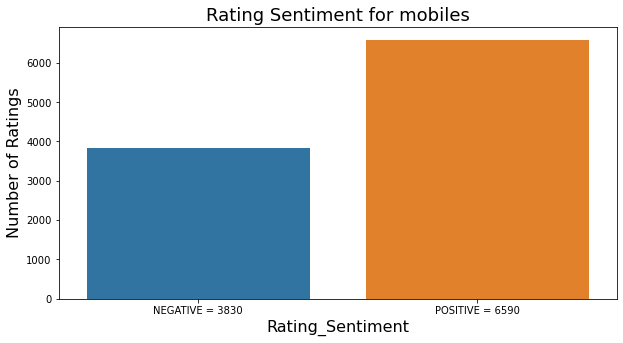

In [18]:
#  countplot showing number of postive and negative reviews
plt.figure(figsize=(10,5))
sns.countplot(x="Rating_Sentiment", data=data_f)
Negative = data_f[data_f['Rating_Sentiment']== 'negative'].shape[0]
Positive =  data_f[data_f['Rating_Sentiment']== 'positive'].shape[0]
plt.xticks((0,1),['NEGATIVE = {}'.format(Negative),'POSITIVE = {}'.format(Positive)])
plt.title("Rating Sentiment for mobiles", size=18)
plt.xlabel('Rating_Sentiment',fontdict={'size': 16})
plt.ylabel('Number of Ratings',fontdict={'size': 16})
plt.show()


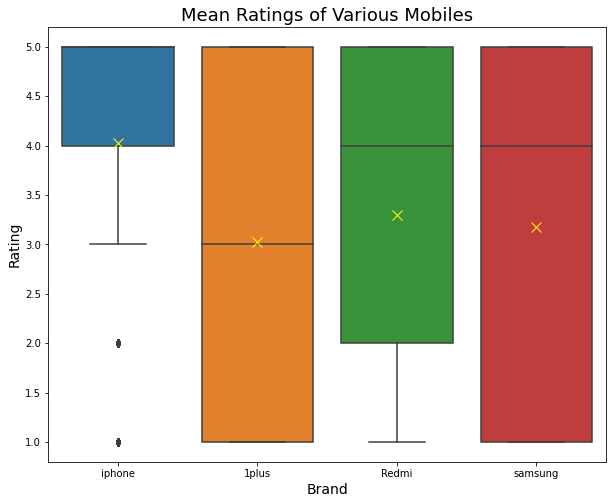

In [19]:
#  Boxplot showing Mean ratings of various mobile phone Brands. Here X denotes the mean of the ratings. 
plt.figure(figsize=(10, 8))
sns.boxplot(x='Brand',y='stars',data=data_n,showmeans=True,
            meanprops={"marker": "x","markeredgecolor": "yellow","markersize": "10"})
plt.ylabel("Rating", size=14)
plt.xlabel("Brand", size=14)
plt.title("Mean Ratings of Various Mobiles", size=18)
plt.show()


In [20]:
# Mean Brand vs star ratings
data_n.groupby('Brand')['stars'].mean()

Brand
1plus      3.024706
Redmi      3.294551
iphone     4.027044
samsung    3.170988
Name: stars, dtype: float64

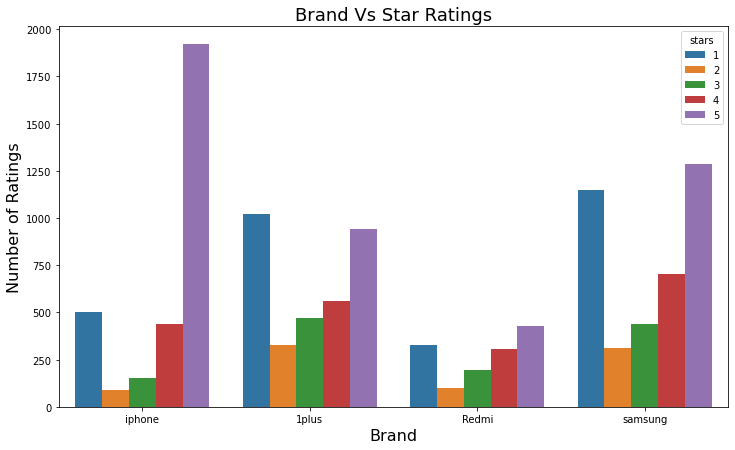

In [21]:
#  Countplot of Mobile Brand Vs Star Ratings
plt.figure(figsize=(12,7))
sns.countplot(x="Brand", hue='stars', data=data_n)
plt.title("Brand Vs Star Ratings", size=18)
plt.xlabel('Brand',fontdict={'size': 16})
plt.ylabel('Number of Ratings',fontdict={'size': 16})
plt.show()


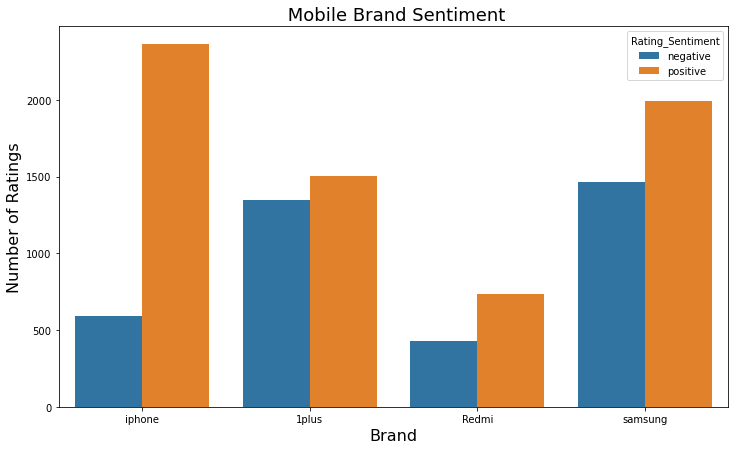

In [22]:
#  Countplot of Brand Vs Rating Sentiment 

plt.figure(figsize=(12,7))
sns.countplot(x="Brand", hue='Rating_Sentiment', data=data_f)
plt.title(" Mobile Brand Sentiment", size=18)
plt.xlabel('Brand',fontdict={'size': 16})
plt.ylabel('Number of Ratings',fontdict={'size': 16})
plt.show()


### Based on number of postive ratings most trusted brand can be analysed

In [23]:
#  Finding out Number of positive Ratings in each brand. Helps in understanding most trusted brand.

p = data_f[data_f['Rating_Sentiment']=='positive'].groupby(['Brand','Rating_Sentiment'])['Rating_Sentiment'].count()[0]
q = data_f[data_f['Brand']=='1plus'].shape[0]
r = data_f[data_f['Rating_Sentiment']=='positive'].groupby(['Brand','Rating_Sentiment'])['Rating_Sentiment'].count()[1]
t = data_f[data_f['Brand']=='Redmi'].shape[0]
x = data_f[data_f['Rating_Sentiment']=='positive'].groupby(['Brand','Rating_Sentiment'])['Rating_Sentiment'].count()[2]
y = data_f[data_f['Brand']=='iphone'].shape[0]
w = data_f[data_f['Rating_Sentiment']=='positive'].groupby(['Brand','Rating_Sentiment'])['Rating_Sentiment'].count()[3]
z = data_f[data_f['Brand']=='samsung'].shape[0]
p_rating_iphone = (x/y)*100
p_rating_1plus = (p/q)*100
p_rating_Redmi = (r/t)*100
p_rating_samsung = (w/z)*100



In [24]:
print('iphone_positive_rating = '+'{:.2f}'.format(p_rating_iphone),'%')
print('Oneplus_positive_rating = '+'{:.2f}'.format(p_rating_1plus),'%')
print('Redmi_positive_rating = '+'{:.2f}'.format(p_rating_Redmi),'%')
print('samsung_positive_rating = '+'{:.2f}'.format(p_rating_samsung),'%')

iphone_positive_rating = 79.98 %
Oneplus_positive_rating = 52.79 %
Redmi_positive_rating = 63.00 %
samsung_positive_rating = 57.64 %


In [25]:
p_rate = {'Brand': ['1plus', 'Redmi', 'iphone', 'samsung'], 'Positive_Rating_Percentage': [52.79, 63.00, 79.98, 57.64]}    
df = pd.DataFrame(p_rate)
df

,Brand,Positive_Rating_Percentage
0,1plus,52.79
1,Redmi,63.00
2,iphone,79.98
3,samsung,57.64


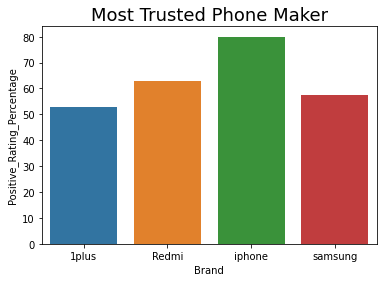

In [26]:
sns.barplot(x = 'Brand', y = 'Positive_Rating_Percentage',data = df)
plt.title("Most Trusted Phone Maker", size=18)
plt.show()

## Iphone and Redmi data being in the the top two is further analysed to identify the best month to purchase

### Iphone Analysis

In [27]:
#  Iphone data being in top is further analysed to identify suitable month to purchase
data_iphone = pd.read_csv("amazon_iphone.csv")
data_iphone.shape
data_iphone.head()
data_iphone = pd.read_csv("amazon_iphone.csv", names=['Reviews', 'Helpful', 'Date', 'Ratings'])
data_iphone.head()


,Reviews,Helpful,Date,Ratings
0,NaN,NaN,NaN,NaN
1,Please do not buy expensive product like iphon...,"27,960",Reviewed in India on 10 July 2020,1.0 out of 5 stars
2,Bought the mobile from appario retail ltd. Mob...,"10,410",Reviewed in India on 13 November 2019,1.0 out of 5 stars
3,Awesome Phone. Nice upgrade from iPhone 6s to ...,"3,886",Reviewed in India on 30 September 2019,5.0 out of 5 stars
4,The iPhone design is good and the camera quali...,"1,928",Reviewed in India on 29 September 2019,5.0 out of 5 stars


<AxesSubplot:>

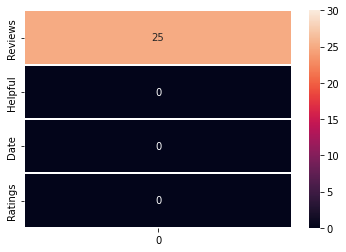

In [28]:
data_iphone = data_iphone.iloc[1:]
data_iphone.head()
null_data = pd.DataFrame(data_iphone.isnull().sum())
sns.heatmap(null_data, vmax=30, linewidths=0.03, annot=True, fmt='d')


In [29]:
#  To obtain the approximate month of purchase/review written
data_iphone['Month'] = data_iphone['Date'].astype(str).str.split().str[-2]
data_iphone.head()


,Reviews,Helpful,Date,Ratings,Month
1,Please do not buy expensive product like iphon...,"27,960",Reviewed in India on 10 July 2020,1.0 out of 5 stars,July
2,Bought the mobile from appario retail ltd. Mob...,"10,410",Reviewed in India on 13 November 2019,1.0 out of 5 stars,November
3,Awesome Phone. Nice upgrade from iPhone 6s to ...,"3,886",Reviewed in India on 30 September 2019,5.0 out of 5 stars,September
4,The iPhone design is good and the camera quali...,"1,928",Reviewed in India on 29 September 2019,5.0 out of 5 stars,September
5,My Phone is Producing Too Much Heat Even Didn’...,"1,782",Reviewed in India on 14 October 2019,1.0 out of 5 stars,October


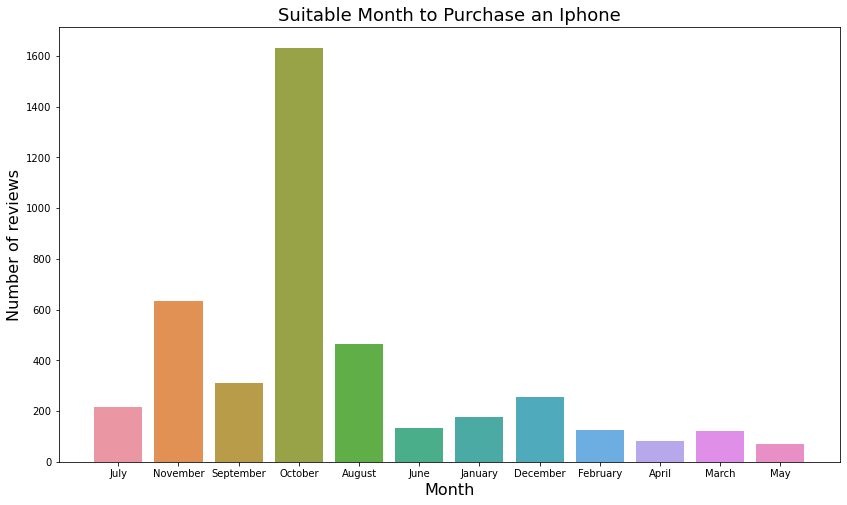

In [30]:
plt.figure(figsize=(14,8))
sns.countplot(x="Month", data=data_iphone)
sns.scatterplot(x="Month",data=data_iphone)
plt.title("Suitable Month to Purchase an Iphone", size=18)
plt.xlabel('Month',fontdict={'size': 16})
plt.ylabel('Number of reviews',fontdict={'size': 16})
plt.show()

### Best suited Month/ year of time for purchase of an Iphone would be October.

###   Redmi Brand Analysis.


In [31]:
data_Redmi = pd.read_csv("Redmi_reviews.csv")
data_Redmi.head()
data_Redmi = pd.read_csv("Redmi_reviews.csv", names=['Reviews', 'Helpful', 'Date','comments', 'Ratings'])
data_Redmi.head()


,Reviews,Helpful,Date,comments,Ratings
NaN,0,1,2,3.0,4
0.0,"\n\n Processor is bit slow, camera is below a...",72 people found this helpful,Reviewed in India on 11 September 2020,NaN,3.0 out of 5 stars
1.0,\n\n Overall its good and satisfied for the p...,58 people found this helpful,Reviewed in India on 15 September 2020,NaN,4.0 out of 5 stars
2.0,\n\n Very very Poor Mobile. If you have used ...,54 people found this helpful,Reviewed in India on 18 September 2020,NaN,1.0 out of 5 stars
3.0,\n\n best good product prive battry camera al...,56 people found this helpful,Reviewed in India on 3 September 2020,NaN,5.0 out of 5 stars


<AxesSubplot:>

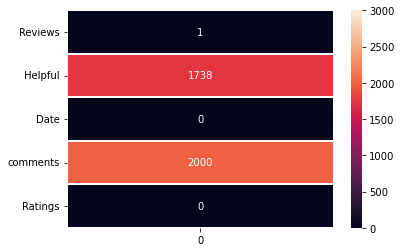

In [32]:
data_Redmi = data_Redmi.iloc[1:]
null_data = pd.DataFrame(data_Redmi.isnull().sum())
sns.heatmap(null_data, vmax=3000, linewidths=0.03, annot=True, fmt='d')

In [33]:
data_Redmi = data_Redmi.drop(['comments'],axis=1)
data_Redmi['Month'] = data_Redmi['Date'].astype(str).str.split().str[-2]
data_Redmi.head()


,Reviews,Helpful,Date,Ratings,Month
0.0,"\n\n Processor is bit slow, camera is below a...",72 people found this helpful,Reviewed in India on 11 September 2020,3.0 out of 5 stars,September
1.0,\n\n Overall its good and satisfied for the p...,58 people found this helpful,Reviewed in India on 15 September 2020,4.0 out of 5 stars,September
2.0,\n\n Very very Poor Mobile. If you have used ...,54 people found this helpful,Reviewed in India on 18 September 2020,1.0 out of 5 stars,September
3.0,\n\n best good product prive battry camera al...,56 people found this helpful,Reviewed in India on 3 September 2020,5.0 out of 5 stars,September
4.0,\n\n\n Your browser does not support HTML5 vi...,37 people found this helpful,Reviewed in India on 12 September 2020,1.0 out of 5 stars,September


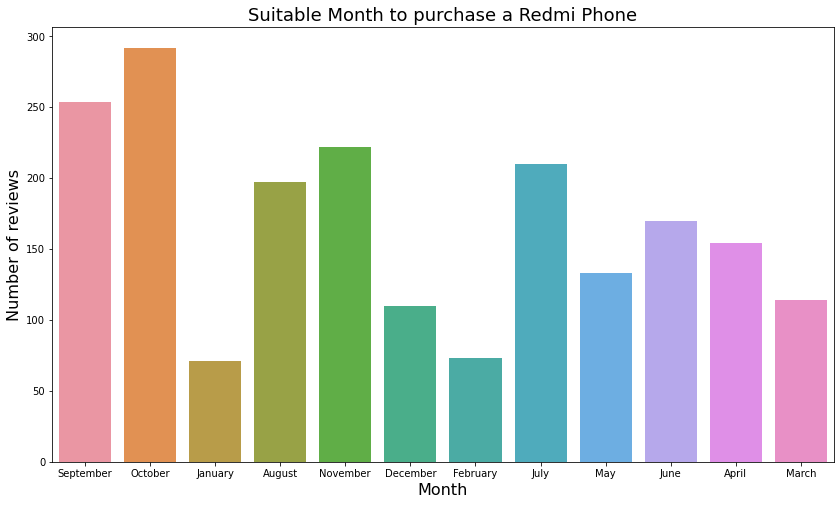

In [34]:
plt.figure(figsize=(14,8))
sns.countplot(x="Month", data=data_Redmi)
plt.title("Suitable Month to purchase a Redmi Phone", size=18)
plt.xlabel('Month',fontdict={'size': 16})
plt.ylabel('Number of reviews',fontdict={'size': 16})
plt.show()


### Best suited Month/ year of time for purchase of a Redmi branded Phone would be September/October.





## Sentiment Analysis Based On Reviews

In [35]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chaitanya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

###                                                       Use of Nltk Sentiment Library


In [36]:
import warnings 
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
data_f['scores'] = data_f['Reviews'].apply(lambda review: sia.polarity_scores(review))
data_f.head()

,Brand,Reviews,Ratings,stars,Rating_Sentiment,scores
1,iphone,Please do not buy expensive product like iphon...,1.0 out of 5 stars,1,negative,"{'neg': 0.163, 'neu': 0.755, 'pos': 0.082, 'co..."
2,iphone,Bought the mobile from appario retail ltd. Mob...,1.0 out of 5 stars,1,negative,"{'neg': 0.102, 'neu': 0.798, 'pos': 0.1, 'comp..."
3,iphone,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0 out of 5 stars,5,positive,"{'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'comp..."
4,iphone,The iPhone design is good and the camera quali...,5.0 out of 5 stars,5,positive,"{'neg': 0.022, 'neu': 0.832, 'pos': 0.145, 'co..."
5,iphone,My Phone is Producing Too Much Heat Even Didn’...,1.0 out of 5 stars,1,negative,"{'neg': 0.123, 'neu': 0.706, 'pos': 0.171, 'co..."


In [37]:
data_f['compound'] = data_f['scores'].apply(lambda score_dict: score_dict['compound'])
data_f.head()

,Brand,Reviews,Ratings,stars,Rating_Sentiment,scores,compound
1,iphone,Please do not buy expensive product like iphon...,1.0 out of 5 stars,1,negative,"{'neg': 0.163, 'neu': 0.755, 'pos': 0.082, 'co...",-0.9116
2,iphone,Bought the mobile from appario retail ltd. Mob...,1.0 out of 5 stars,1,negative,"{'neg': 0.102, 'neu': 0.798, 'pos': 0.1, 'comp...",-0.1027
3,iphone,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0 out of 5 stars,5,positive,"{'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'comp...",0.9495
4,iphone,The iPhone design is good and the camera quali...,5.0 out of 5 stars,5,positive,"{'neg': 0.022, 'neu': 0.832, 'pos': 0.145, 'co...",0.9647
5,iphone,My Phone is Producing Too Much Heat Even Didn’...,1.0 out of 5 stars,1,negative,"{'neg': 0.123, 'neu': 0.706, 'pos': 0.171, 'co...",0.2554


In [38]:
#  classifying negative/ postive based on compund score
data_f['Review_Sentiment'] = data_f['compound'].apply(lambda c: 'positive' if c >= 0 else 'negative')
data_f.head()

,Brand,Reviews,Ratings,stars,Rating_Sentiment,scores,compound,Review_Sentiment
1,iphone,Please do not buy expensive product like iphon...,1.0 out of 5 stars,1,negative,"{'neg': 0.163, 'neu': 0.755, 'pos': 0.082, 'co...",-0.9116,negative
2,iphone,Bought the mobile from appario retail ltd. Mob...,1.0 out of 5 stars,1,negative,"{'neg': 0.102, 'neu': 0.798, 'pos': 0.1, 'comp...",-0.1027,negative
3,iphone,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0 out of 5 stars,5,positive,"{'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'comp...",0.9495,positive
4,iphone,The iPhone design is good and the camera quali...,5.0 out of 5 stars,5,positive,"{'neg': 0.022, 'neu': 0.832, 'pos': 0.145, 'co...",0.9647,positive
5,iphone,My Phone is Producing Too Much Heat Even Didn’...,1.0 out of 5 stars,1,negative,"{'neg': 0.123, 'neu': 0.706, 'pos': 0.171, 'co...",0.2554,positive


##  Comparison of Sentiment analysis of Reviews and  Star ratings

In [39]:


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(data_f['Rating_Sentiment'],data_f['Review_Sentiment']))
print(confusion_matrix(data_f['Rating_Sentiment'],data_f['Review_Sentiment']))
accuracy_score(data_f['Rating_Sentiment'],data_f['Review_Sentiment'])


              precision    recall  f1-score   support

    negative       0.80      0.63      0.71      3830
    positive       0.81      0.91      0.86      6590

    accuracy                           0.81     10420
   macro avg       0.80      0.77      0.78     10420
weighted avg       0.81      0.81      0.80     10420

[[2426 1404]
 [ 608 5982]]


0.8069097888675624

###          80% accuracy achieved during comparison of Review Sentiment and Rating Sentiment

#            Pre-processing of Reviews for further analysis in ML models

In [40]:
from wordcloud import WordCloud,STOPWORDS
train_pos = data_f[ data_f['Review_Sentiment'] == 'positive']
train_pos

,Brand,Reviews,Ratings,stars,Rating_Sentiment,scores,compound,Review_Sentiment
3,iphone,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0 out of 5 stars,5,positive,"{'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'comp...",0.9495,positive
4,iphone,The iPhone design is good and the camera quali...,5.0 out of 5 stars,5,positive,"{'neg': 0.022, 'neu': 0.832, 'pos': 0.145, 'co...",0.9647,positive
5,iphone,My Phone is Producing Too Much Heat Even Didn’...,1.0 out of 5 stars,1,negative,"{'neg': 0.123, 'neu': 0.706, 'pos': 0.171, 'co...",0.2554,positive
11,iphone,If its just looks what you want then go ahead ...,1.0 out of 5 stars,1,negative,"{'neg': 0.063, 'neu': 0.87, 'pos': 0.068, 'com...",0.1874,positive
13,iphone,"In my opinion, don’t think much about the pho...",5.0 out of 5 stars,5,positive,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.9837,positive
...,...,...,...,...,...,...,...,...
16629,samsung,\n\n This one was choosen just not to buy any...,5.0 out of 5 stars,5,positive,"{'neg': 0.068, 'neu': 0.796, 'pos': 0.137, 'co...",0.8183,positive
16630,samsung,"\n\n Battery life is okay. At a full charge, ...",4.0 out of 5 stars,4,positive,"{'neg': 0.062, 'neu': 0.834, 'pos': 0.105, 'co...",0.2375,positive
16633,samsung,\n\n What I like about the Samsung M21:1: Qui...,5.0 out of 5 stars,5,positive,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'comp...",0.9712,positive
16635,samsung,\n\n Had read here in most of the other revie...,4.0 out of 5 stars,4,positive,"{'neg': 0.062, 'neu': 0.829, 'pos': 0.109, 'co...",0.9533,positive


In [41]:
train_pos = data_f[ data_f['Review_Sentiment'] == 'positive']
train_pos = train_pos['Reviews']
train_pos

3        Awesome Phone. Nice upgrade from iPhone 6s to ...
4        The iPhone design is good and the camera quali...
5        My Phone is Producing Too Much Heat Even Didn’...
11       If its just looks what you want then go ahead ...
13       In my opinion, don’t  think much about the pho...
                               ...                        
16629    \n\n  This one was choosen just not to buy any...
16630    \n\n  Battery life is okay. At a full charge, ...
16633    \n\n  What I like about the Samsung M21:1: Qui...
16635    \n\n  Had read here in most of the other revie...
16636    \n\n  First I want to say about the processor ...
Name: Reviews, Length: 7386, dtype: object

In [42]:
train_neg = data_f[ data_f['Review_Sentiment'] == 'negative']
train_neg = train_neg['Reviews']
train_neg

1        Please do not buy expensive product like iphon...
2        Bought the mobile from appario retail ltd. Mob...
6        Defective product,got heat up within 5 minutes...
7        The product i got was defective . The face id ...
8        Just after i switched it on, it started produc...
                               ...                        
16615    \n\n  I'm writing this review after using M21 ...
16623    \n\n  Not so good as company claim. Camera qua...
16631    \n\n  The Super amoled display is just a Gimmi...
16632    \n\n  I had purchased Samsung galaxy M21 on 25...
16634    \n\n  Fingerprint reader quality is great. The...
Name: Reviews, Length: 3034, dtype: object

In [43]:
def wordcloud_draw(data_f, color = 'black'):
    words = ' '.join(data_f)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
  
    plt.figure(1,figsize=(8, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


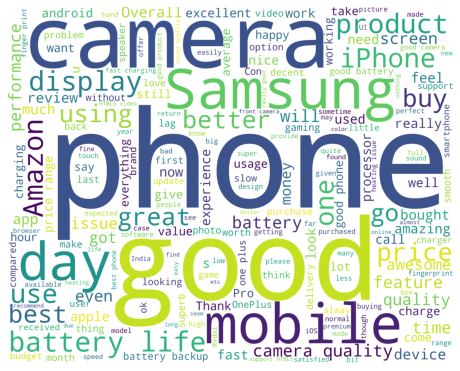

In [44]:
#  Positive words used in the reviews 
print("Positive words")
wordcloud_draw(train_pos,'white')


Negative words


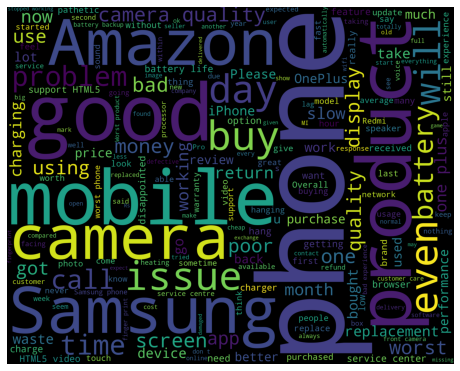

In [45]:
#  Negative words used in the reviews 

print("Negative words")
wordcloud_draw(train_neg)

##               Removing unwanted words

In [46]:
import nltk
nltk.download('stopwords')

import nltk
nltk.download('wordnet')

nltk.download('all')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chaitanya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chaitanya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/chaitanya/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/chaitanya/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/chaitanya/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/chaitanya/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downlo

True

## Use of Stopwords 

In [47]:
 #list of stopwords
stop = set(stopwords.words('english'))
snow = nltk.stem.SnowballStemmer('english')

In [48]:
def decontracted(phrase):
    phrase=re.sub(r"won't","will not",phrase)
    phrase=re.sub(r"can't","can not",phrase)
    phrase=re.sub(r"don't","do not",phrase)
    phrase=re.sub(r"n\'t","not",phrase)
    phrase=re.sub(r"\'re","are",phrase)
    phrase=re.sub(r"\'s","is",phrase)
    phrase=re.sub(r"\'d","would",phrase)
    phrase=re.sub(r"\'ll","will",phrase)    
    phrase=re.sub(r"\'t","not",sentence)
    phrase=re.sub(r"\'ve","have",sentence)
    phrase=re.sub(r"\'m","am",sentence)
    return phrase
preprocessed_reviews=[]
for sentence in data_f['Reviews'].values:
    sentence = re.sub('Your browser does not support HTML5 video.',  '', sentence) 
    sentence=re.sub(r"http\S+"," ",sentence)         #removes urls
    sentence=BeautifulSoup(sentence,'html').get_text()
    clean =re.compile('<.*?>')
    sentence=re.sub(clean,' ',sentence)
    sentence=decontracted(sentence)
    sentence=re.sub("\S\*\d\S*"," ",sentence)
    sentence=re.sub("[^A-Za-z]+"," ",sentence)
    sentence=re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    sentence=re.sub(r'[.|,|)|(|\|/]',r' ',sentence)
    sentence='  '.join(snow.stem(e.lower()) for e in sentence.split() if e.lower()  not in stop)
    preprocessed_reviews.append(sentence.strip())

In [49]:
# copying preprocessed reviews into the dataframe
data_f['pre_reviews'] = preprocessed_reviews.copy()
data_f.head()

,Brand,Reviews,Ratings,stars,Rating_Sentiment,scores,compound,Review_Sentiment,pre_reviews
1,iphone,Please do not buy expensive product like iphon...,1.0 out of 5 stars,1,negative,"{'neg': 0.163, 'neu': 0.755, 'pos': 0.082, 'co...",-0.9116,negative,pleas buy expens product like iphon amaz...
2,iphone,Bought the mobile from appario retail ltd. Mob...,1.0 out of 5 stars,1,negative,"{'neg': 0.102, 'neu': 0.798, 'pos': 0.1, 'comp...",-0.1027,negative,bought mobil appario retail ltd mobil he...
3,iphone,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0 out of 5 stars,5,positive,"{'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'comp...",0.9495,positive,awesom phone nice upgrad iphon iphon lov...
4,iphone,The iPhone design is good and the camera quali...,5.0 out of 5 stars,5,positive,"{'neg': 0.022, 'neu': 0.832, 'pos': 0.145, 'co...",0.9647,positive,iphon design good camera qualiti awesom ...
5,iphone,My Phone is Producing Too Much Heat Even Didn’...,1.0 out of 5 stars,1,negative,"{'neg': 0.123, 'neu': 0.706, 'pos': 0.171, 'co...",0.2554,positive,phone produc much heat even put sim nev...


In [50]:
# Preprocessed Reviews

preprocessed_reviews[:5]


['pleas  buy  expens  product  like  iphon  amazon  bad  exp  charger  cord  miss  sound  qualiti  issu  amazon  initi  told  charger  come  box  challeng  ask  reimburs  cord  amount  request  replac  day  call  inform  dont  take  respons  miss  item  day  replac  polici  dont  follow  read  email  convers  attach  mention  everi  thing  call  record  well  last  deni  phone  replac  even  provid  miss  cord  damag  qualiti  issu  said  amazon  respons',
 'bought  mobil  appario  retail  ltd  mobil  heat  within  second  also  camera  mode  work  proper  particular  portrait  mode  stage  light  mono  option  work  proper  rais  appl  custom  care  confirm  softwar  issu  amazon  custom  care  told  need  job  card  report  appl  servic  center  nearest  servic  center  locat  km  place  imagin  amount  strain  much  go  cost  buy  anyth  seller  googl  u  find  numer  complaint  seller  ever  sell  u  find  defect  product  thread  seller  dubious  deal  quora  pleas  safe  regret',

### Data set has been preprocssed and has been made ready for working on various ML models.

### The group aims to understand the accuracy of the dataset generated through various ML models. 

### Further best suited ML model will be identified.
   
   
   
   
   

# Splitting data into training and testing data

In [51]:
from sklearn.model_selection import train_test_split
y = data_f['Review_Sentiment'].tolist()
X = data_f.loc[:,'Reviews'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer = TfidfVectorizer(ngram_range = (1,3), stop_words=None,min_df=10)
X_train_tf = tokenizer.fit_transform(X_train).toarray()
X_test_tf = tokenizer.transform(X_test).toarray()

In [53]:
print(X_train_tf.shape)


(8336, 8892)


In [54]:
print(X_test_tf.shape)

(2084, 8892)


# USING REVIEW SENTIMENT ON VARIOUS ML MODELS 



##  Five ML models have been applied on the data set to include 
  
    (a)  Naive Bayes Classifier.  
    
    (b)  Logistic Regression.  

    (c)  Random Forest.  
    
    (d)  Support Vector Machine.  
    
    (e)  Bag Classifier.  
    
    
    

##                                Naive bayes classifier algorithm 

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

NBclassifier = GaussianNB()
NBclassifier.fit(X_train_tf, y_train)

GaussianNB()

In [56]:
## Predictions
train_nb_preds = NBclassifier.predict(X_train_tf)
test_nb_preds = NBclassifier.predict(X_test_tf)

In [57]:
#  Training Accuracy
print("Train Accuracy",NBclassifier.score(X_train_tf,y_train))
print(confusion_matrix(y_train,train_nb_preds))
print(classification_report(y_train,train_nb_preds))


Train Accuracy 0.7852687140115163
[[2415   28]
 [1762 4131]]
              precision    recall  f1-score   support

    negative       0.58      0.99      0.73      2443
    positive       0.99      0.70      0.82      5893

    accuracy                           0.79      8336
   macro avg       0.79      0.84      0.78      8336
weighted avg       0.87      0.79      0.79      8336



In [58]:
#  Testing Accuracy

print("Test Accuracy",NBclassifier.score(X_test_tf,y_test))
print(confusion_matrix(y_test,test_nb_preds))
print(classification_report(y_test,test_nb_preds))

Test Accuracy 0.6914587332053743
[[467 124]
 [519 974]]
              precision    recall  f1-score   support

    negative       0.47      0.79      0.59       591
    positive       0.89      0.65      0.75      1493

    accuracy                           0.69      2084
   macro avg       0.68      0.72      0.67      2084
weighted avg       0.77      0.69      0.71      2084



##                                         Logistic Regression alogorithm

In [59]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train_tf,y_train)

## Predictions
train_logit_preds = logit.predict(X_train_tf)
test_logit_preds = logit.predict(X_test_tf)

print("Train Accuracy",logit.score(X_train_tf,y_train))
print(confusion_matrix(y_train,train_logit_preds))
print(classification_report(y_train,train_logit_preds))

print("Test Accuracy",logit.score(X_test_tf,y_test))
print(confusion_matrix(y_test,test_logit_preds))
print(classification_report(y_test,test_logit_preds))


Train Accuracy 0.9049904030710173
[[1833  610]
 [ 182 5711]]
              precision    recall  f1-score   support

    negative       0.91      0.75      0.82      2443
    positive       0.90      0.97      0.94      5893

    accuracy                           0.90      8336
   macro avg       0.91      0.86      0.88      8336
weighted avg       0.91      0.90      0.90      8336

Test Accuracy 0.8507677543186181
[[ 372  219]
 [  92 1401]]
              precision    recall  f1-score   support

    negative       0.80      0.63      0.71       591
    positive       0.86      0.94      0.90      1493

    accuracy                           0.85      2084
   macro avg       0.83      0.78      0.80      2084
weighted avg       0.85      0.85      0.84      2084



##                                                 Randomforest algorithm

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer
score_metric = make_scorer(f1_score, pos_label='positive')
## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree
rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt', class_weight='balanced')
 
# Use a grid over parameters of interest
## n_estimators is the number of trees in the forest
## max_depth is how deep each tree can be
## min_sample_leaf is the minimum samples required in each leaf node for the root node to split
## "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf"

param_grid = {"n_estimators" : [10, 25, 50, 75, 100],
           "max_depth" : [10, 12, 14, 16, 18, 20],
           "min_samples_leaf" : [5, 10, 15, 20]}
 
rfc_cv_grid = RandomizedSearchCV(estimator = rfc_grid, param_distributions = param_grid, cv = 3, n_iter=20, scoring=score_metric, n_jobs=8)
rfc_cv_grid.fit(X_train_tf, y_train)
rfc_cv_grid.best_estimator_



RandomForestClassifier(class_weight='balanced', max_depth=16,
                       max_features='sqrt', min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1)

In [61]:
from sklearn.metrics import recall_score, accuracy_score
rfc_train_pred = rfc_cv_grid.best_estimator_.predict(X_train_tf)
rfc_test_pred = rfc_cv_grid.best_estimator_.predict(X_test_tf)

print("Training Accuracy")
print(accuracy_score(y_train,rfc_train_pred))
print(confusion_matrix(y_train,rfc_train_pred))
print(classification_report(y_train,rfc_train_pred))

print("Testing Accuracy")
print(accuracy_score(y_test,rfc_test_pred))
print(confusion_matrix(y_test,rfc_test_pred))
print(classification_report(y_test,rfc_test_pred))

Training Accuracy
0.8603646833013435
[[2067  376]
 [ 788 5105]]
              precision    recall  f1-score   support

    negative       0.72      0.85      0.78      2443
    positive       0.93      0.87      0.90      5893

    accuracy                           0.86      8336
   macro avg       0.83      0.86      0.84      8336
weighted avg       0.87      0.86      0.86      8336

Testing Accuracy
0.8267754318618042
[[ 460  131]
 [ 230 1263]]
              precision    recall  f1-score   support

    negative       0.67      0.78      0.72       591
    positive       0.91      0.85      0.87      1493

    accuracy                           0.83      2084
   macro avg       0.79      0.81      0.80      2084
weighted avg       0.84      0.83      0.83      2084



##                                Support vector machine 

In [62]:
from sklearn.svm import SVC
svm_model = SVC(C=.1, gamma=1, kernel='rbf', cache_size=5900, )
svm_model.fit(X_train_tf, y_train)

train_svm_preds = svm_model.predict(X_train_tf)
test_svm_preds = svm_model.predict(X_test_tf)

print("Train Accuracy",svm_model.score(X_train_tf,y_train))
print(confusion_matrix(y_train,train_svm_preds))
print(classification_report(y_train,train_svm_preds))

print("Test Accuracy",svm_model.score(X_test_tf,y_test))
print(confusion_matrix(y_test,test_svm_preds))
print(classification_report(y_test,test_svm_preds))

Train Accuracy 0.7224088291746641
[[ 132 2311]
 [   3 5890]]
              precision    recall  f1-score   support

    negative       0.98      0.05      0.10      2443
    positive       0.72      1.00      0.84      5893

    accuracy                           0.72      8336
   macro avg       0.85      0.53      0.47      8336
weighted avg       0.79      0.72      0.62      8336

Test Accuracy 0.72552783109405
[[  22  569]
 [   3 1490]]
              precision    recall  f1-score   support

    negative       0.88      0.04      0.07       591
    positive       0.72      1.00      0.84      1493

    accuracy                           0.73      2084
   macro avg       0.80      0.52      0.46      2084
weighted avg       0.77      0.73      0.62      2084



##                                                 BagClassifier algorithm

In [63]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

BagClassifier = BaggingClassifier(SVC(C=50,gamma=1,kernel='rbf',cache_size=1900),
                                  n_estimators=12,max_samples=0.20,n_jobs=-1)
BagClassifier.fit(X_train_tf,y_train)
print("Train Accuracy",BagClassifier.score(X_train_tf,y_train))
print("Test Accuracy",BagClassifier.score(X_test_tf,y_test))

Train Accuracy 0.8584452975047985
Test Accuracy 0.8450095969289827


##            Comparison of ML models used to understand best suited ML model on the data set


###                                                      Training Accuracy

In [64]:
Training_Acc = {'Classifier': ['naive_bayes', 'Logistic_Regression', 'RandomForest', 'SVM','BagClassifier' ], 
                'Accuracy_Percentage': [78.67, 90.53, 86.06, 72.31, 85.80]}    
Training_Accuracy = pd.DataFrame(Training_Acc)
Training_Accuracy 

,Classifier,Accuracy_Percentage
0,naive_bayes,78.67
1,Logistic_Regression,90.53
2,RandomForest,86.06
3,SVM,72.31
4,BagClassifier,85.80


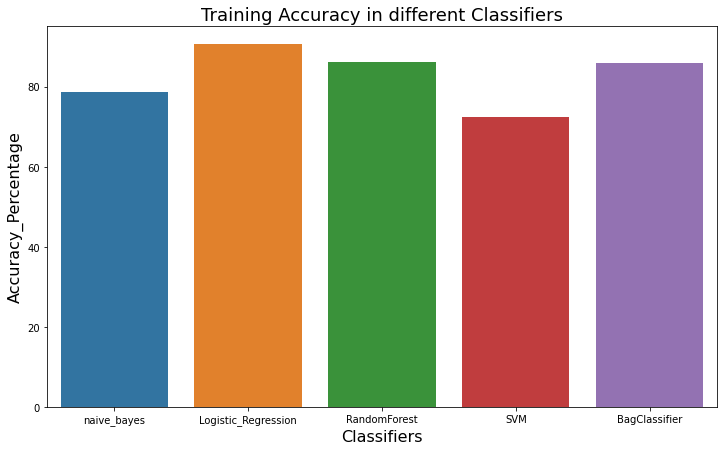

'logistic regression model has provided the best accuracy result for the model '

In [65]:
# Barplot for various classifiers
plt.figure(figsize=(12,7))
sns.barplot(x = 'Classifier', y = 'Accuracy_Percentage',data = Training_Accuracy )
plt.title("Training Accuracy in different Classifiers", size=18)
plt.xlabel('Classifiers',fontdict={'size': 16})
plt.ylabel('Accuracy_Percentage',fontdict={'size': 16})
plt.show()

'''logistic regression model has provided the best accuracy result for the model '''

###                                                      Testing Accuracy


In [66]:
Testing_Acc = {'Classifier': ['naive_bayes', 'Logistic_Regression', 'RandomForest', 'SVM','BagClassifier' ],
               'Accuracy_Percentage': [69.19, 84.88, 82.86, 72.55, 83.97]}    
Testing_Accuracy = pd.DataFrame(Testing_Acc)
Testing_Accuracy 

,Classifier,Accuracy_Percentage
0,naive_bayes,69.19
1,Logistic_Regression,84.88
2,RandomForest,82.86
3,SVM,72.55
4,BagClassifier,83.97


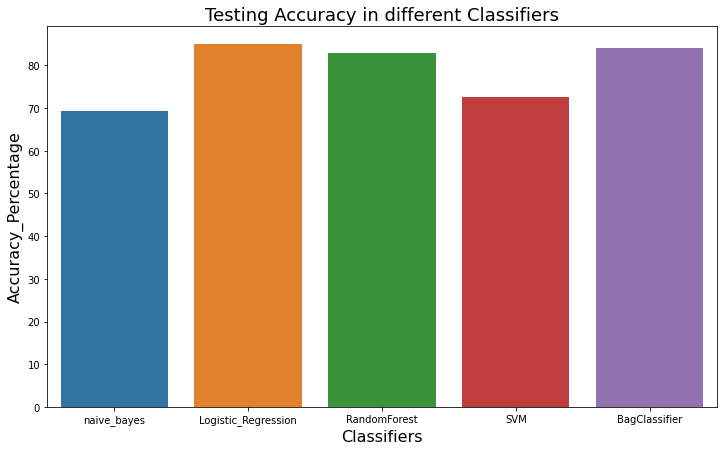

In [67]:
plt.figure(figsize=(12,7))
sns.barplot(x = 'Classifier', y = 'Accuracy_Percentage',data = Testing_Accuracy )
plt.title("Testing Accuracy in different Classifiers", size=18)
plt.xlabel('Classifiers',fontdict={'size': 16})
plt.ylabel('Accuracy_Percentage',fontdict={'size': 16})
plt.show()

### logistic regression model has provided the best accuracy result on the dataset.

##                                                     Tensorflow

In [68]:
def Rv_Sentiment_n(x):
    if x=='positive':
        return 1
    else:
        return 0
s=data_f['Review_Sentiment']
d=list(map(Rv_Sentiment_n,s))
data_f['Rv_sentiment_n']=d
data_f.head()



,Brand,Reviews,Ratings,stars,Rating_Sentiment,scores,compound,Review_Sentiment,pre_reviews,Rv_sentiment_n
1,iphone,Please do not buy expensive product like iphon...,1.0 out of 5 stars,1,negative,"{'neg': 0.163, 'neu': 0.755, 'pos': 0.082, 'co...",-0.9116,negative,pleas buy expens product like iphon amaz...,0
2,iphone,Bought the mobile from appario retail ltd. Mob...,1.0 out of 5 stars,1,negative,"{'neg': 0.102, 'neu': 0.798, 'pos': 0.1, 'comp...",-0.1027,negative,bought mobil appario retail ltd mobil he...,0
3,iphone,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0 out of 5 stars,5,positive,"{'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'comp...",0.9495,positive,awesom phone nice upgrad iphon iphon lov...,1
4,iphone,The iPhone design is good and the camera quali...,5.0 out of 5 stars,5,positive,"{'neg': 0.022, 'neu': 0.832, 'pos': 0.145, 'co...",0.9647,positive,iphon design good camera qualiti awesom ...,1
5,iphone,My Phone is Producing Too Much Heat Even Didn’...,1.0 out of 5 stars,1,negative,"{'neg': 0.123, 'neu': 0.706, 'pos': 0.171, 'co...",0.2554,positive,phone produc much heat even put sim nev...,1


In [69]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")
import tensorflow as tf

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

split = round(len(data_f)*0.8)
train_reviews = data_f['Reviews'][:split]
train_label = data_f['Rv_sentiment_n'][:split]
test_reviews = data_f['Reviews'][split:]
test_label = data_f['Rv_sentiment_n'][split:]



2021-11-14 12:48:34.093738: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [70]:
import numpy as np
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,       input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           640000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 640,109
Trainable params: 640,109
Non-trainable params: 0
_________________________________________________________________


###              20 number of epochs have been considered

In [71]:

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels_final))



Epoch 1/20


2021-11-14 12:48:34.788489: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


261/261 [==============================] - 1s 4ms/step - loss: 0.6389 - accuracy: 0.7173 - val_loss: 0.6026 - val_accuracy: 0.6924
Epoch 2/20
261/261 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.7153 - val_loss: 0.5508 - val_accuracy: 0.6977
Epoch 3/20
261/261 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7300 - val_loss: 0.4332 - val_accuracy: 0.7812
Epoch 4/20
261/261 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8031 - val_loss: 0.3846 - val_accuracy: 0.8253
Epoch 5/20
261/261 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8452 - val_loss: 0.3661 - val_accuracy: 0.8364
Epoch 6/20
261/261 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8641 - val_loss: 0.3628 - val_accuracy: 0.8412
Epoch 7/20
261/261 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.8816 - val_loss: 0.3648 - val_accuracy: 0.8440
Epoch 8/20
261/26

'Training Accuracy = 97.00%   Testing Accuracy = 83.73%'

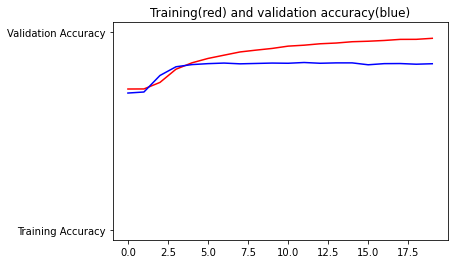

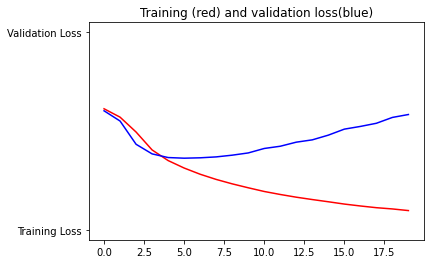

<Figure size 432x288 with 0 Axes>

In [72]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training(red) and validation accuracy(blue)')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training (red) and validation loss(blue)')
plt.figure()
"""Training Accuracy = 97.00%   Testing Accuracy = 83.73%"""


###                                        Tensor flow accuracy

####                   Training Accuracy = 97.00%   Testing Accuracy = 83.73%

#                   USING RATING SENTIMENT ON VARIOUS ML MODELS 


##  Five ML models have been applied 
  
    (a)  Naive Bayes Classifier.  
    
    (b)  Logistic Regression.  

    (c)  Random Forest.  
    
    (d)  Support Vector Machine.  
    
    (e)  Bag Classifier.  

## splitting into training and testing data

In [73]:
from sklearn.model_selection import train_test_split

y = data_f['Rating_Sentiment'].tolist()
X = data_f.loc[:,'Reviews'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer = TfidfVectorizer(ngram_range = (1,3), stop_words=None,min_df=10)
X_train_tf = tokenizer.fit_transform(X_train).toarray()
X_test_tf = tokenizer.transform(X_test).toarray()
print(X_train_tf.shape)
print(X_test_tf.shape)

(8336, 8892)
(2084, 8892)


##                                         Naive Bayes Algorithm

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

NBclassifier = GaussianNB()
NBclassifier.fit(X_train_tf, y_train)

GaussianNB()

In [76]:
## Predictions
train_nb_preds = NBclassifier.predict(X_train_tf)
test_nb_preds = NBclassifier.predict(X_test_tf)
print("Train Accuracy",NBclassifier.score(X_train_tf,y_train))
print(confusion_matrix(y_train,train_nb_preds))
print(classification_report(y_train,train_nb_preds))

print("Test Accuracy",NBclassifier.score(X_test_tf,y_test))
print(confusion_matrix(y_test,test_nb_preds))
print(classification_report(y_test,test_nb_preds))

Train Accuracy 0.8905950095969289
[[3022   24]
 [ 888 4402]]
              precision    recall  f1-score   support

    negative       0.77      0.99      0.87      3046
    positive       0.99      0.83      0.91      5290

    accuracy                           0.89      8336
   macro avg       0.88      0.91      0.89      8336
weighted avg       0.91      0.89      0.89      8336

Test Accuracy 0.8075815738963532
[[ 661  123]
 [ 278 1022]]
              precision    recall  f1-score   support

    negative       0.70      0.84      0.77       784
    positive       0.89      0.79      0.84      1300

    accuracy                           0.81      2084
   macro avg       0.80      0.81      0.80      2084
weighted avg       0.82      0.81      0.81      2084



##                                     Logistic Regression Algorithm

In [77]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train_tf,y_train)

## Predictions
train_logit_preds = logit.predict(X_train_tf)
test_logit_preds = logit.predict(X_test_tf)

print("Train Accuracy",logit.score(X_train_tf,y_train))
print(confusion_matrix(y_train,train_logit_preds))
print(classification_report(y_train,train_logit_preds))

print("Test Accuracy",logit.score(X_test_tf,y_test))
print(confusion_matrix(y_test,test_logit_preds))
print(classification_report(y_test,test_logit_preds))

Train Accuracy 0.9324616122840691
[[2693  353]
 [ 210 5080]]
              precision    recall  f1-score   support

    negative       0.93      0.88      0.91      3046
    positive       0.94      0.96      0.95      5290

    accuracy                           0.93      8336
   macro avg       0.93      0.92      0.93      8336
weighted avg       0.93      0.93      0.93      8336

Test Accuracy 0.9064299424184261
[[ 650  134]
 [  61 1239]]
              precision    recall  f1-score   support

    negative       0.91      0.83      0.87       784
    positive       0.90      0.95      0.93      1300

    accuracy                           0.91      2084
   macro avg       0.91      0.89      0.90      2084
weighted avg       0.91      0.91      0.91      2084



##                                          Random Forest Alogorithm

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer
score_metric = make_scorer(f1_score, pos_label='positive')
## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree
rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt', class_weight='balanced')
 
# Use a grid over parameters of interest
## n_estimators is the number of trees in the forest
## max_depth is how deep each tree can be
## min_sample_leaf is the minimum samples required in each leaf node for the root node to split
## "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf"

param_grid = {"n_estimators" : [10, 25, 50, 75, 100],
           "max_depth" : [10, 12, 14, 16, 18, 20],
           "min_samples_leaf" : [5, 10, 15, 20]}
 
rfc_cv_grid = RandomizedSearchCV(estimator = rfc_grid, param_distributions = param_grid, cv = 3, n_iter=20, scoring=score_metric, n_jobs=8)
rfc_cv_grid.fit(X_train_tf, y_train)
rfc_cv_grid.best_estimator_

from sklearn.metrics import recall_score, accuracy_score
rfc_train_pred = rfc_cv_grid.best_estimator_.predict(X_train_tf)
rfc_test_pred = rfc_cv_grid.best_estimator_.predict(X_test_tf)

print("Train")
print(accuracy_score(y_train,rfc_train_pred))
print(confusion_matrix(y_train,rfc_train_pred))
print(classification_report(y_train,rfc_train_pred))

#print("OOB Score", rfc_cv_grid.oob_score_)

print("Test")
print(accuracy_score(y_test,rfc_test_pred))
print(confusion_matrix(y_test,rfc_test_pred))
print(classification_report(y_test,rfc_test_pred))


Train
0.8919145873320538
[[2588  458]
 [ 443 4847]]
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      3046
    positive       0.91      0.92      0.91      5290

    accuracy                           0.89      8336
   macro avg       0.88      0.88      0.88      8336
weighted avg       0.89      0.89      0.89      8336

Test
0.8785988483685221
[[ 634  150]
 [ 103 1197]]
              precision    recall  f1-score   support

    negative       0.86      0.81      0.83       784
    positive       0.89      0.92      0.90      1300

    accuracy                           0.88      2084
   macro avg       0.87      0.86      0.87      2084
weighted avg       0.88      0.88      0.88      2084



##                                Support Vector Machine algorithm

In [79]:
from sklearn.svm import SVC
svm_model = SVC(C=.1, gamma=1, kernel='rbf', cache_size=5900, )
svm_model.fit(X_train_tf, y_train)

train_svm_preds = svm_model.predict(X_train_tf)
test_svm_preds = svm_model.predict(X_test_tf)

print("Train Accuracy",svm_model.score(X_train_tf,y_train))
print(confusion_matrix(y_train,train_svm_preds))
print(classification_report(y_train,train_svm_preds))

print("Test Accuracy",svm_model.score(X_test_tf,y_test))
print(confusion_matrix(y_test,test_svm_preds))
print(classification_report(y_test,test_svm_preds))


Train Accuracy 0.8007437619961613
[[1428 1618]
 [  43 5247]]
              precision    recall  f1-score   support

    negative       0.97      0.47      0.63      3046
    positive       0.76      0.99      0.86      5290

    accuracy                           0.80      8336
   macro avg       0.87      0.73      0.75      8336
weighted avg       0.84      0.80      0.78      8336

Test Accuracy 0.77447216890595
[[ 325  459]
 [  11 1289]]
              precision    recall  f1-score   support

    negative       0.97      0.41      0.58       784
    positive       0.74      0.99      0.85      1300

    accuracy                           0.77      2084
   macro avg       0.85      0.70      0.71      2084
weighted avg       0.82      0.77      0.75      2084



##                                         Bag Classifier

In [80]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

BagClassifier = BaggingClassifier(SVC(C=50,gamma=1,kernel='rbf',cache_size=1900)
                                  ,n_estimators=12,max_samples=0.20,n_jobs=-1)
BagClassifier.fit(X_train_tf,y_train)
print("Train Accuracy",BagClassifier.score(X_train_tf,y_train))
print("Test Accuracy",BagClassifier.score(X_test_tf,y_test))



Train Accuracy 0.9091890595009597
Test Accuracy 0.8953934740882917


###            Comparison of ML models used to understand best suited ML model on the data set

In [81]:
Training_Rat_Acc = {'Classifier': ['naive_bayes', 'Logistic_Regression', 
                                   'RandomForest', 'SVM','BagClassifier' ], 
                    'Accuracy_Percentage': [89.05, 93.24, 88.98, 80.07, 90.95]}    
Training_Rat_Accuracy = pd.DataFrame(Training_Rat_Acc)
Training_Rat_Accuracy


,Classifier,Accuracy_Percentage
0,naive_bayes,89.05
1,Logistic_Regression,93.24
2,RandomForest,88.98
3,SVM,80.07
4,BagClassifier,90.95


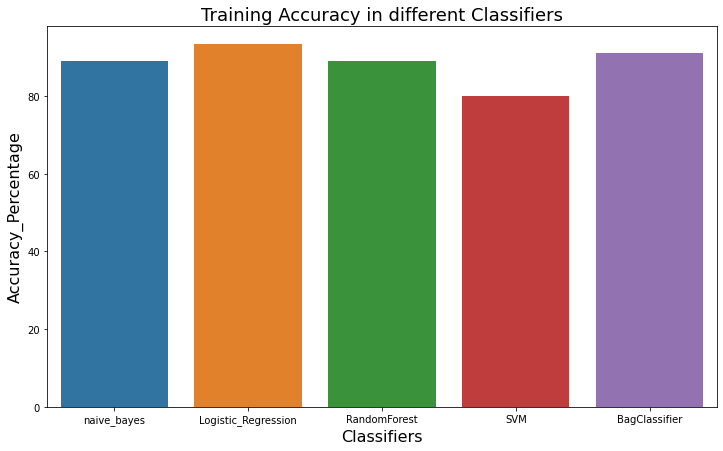

'Logistic Regression is best for Training'

In [82]:
plt.figure(figsize=(12,7))
sns.barplot(x = 'Classifier', y = 'Accuracy_Percentage',data = Training_Rat_Accuracy )
plt.title("Training Accuracy in different Classifiers", size=18)
plt.xlabel('Classifiers',fontdict={'size': 16})
plt.ylabel('Accuracy_Percentage',fontdict={'size': 16})
# Show the plot
plt.show()

"""Logistic Regression is best for Training"""

###                                                                Testing Accuracy

In [83]:
Testing_Rat_Acc = {'Classifier': ['naive_bayes', 'Logistic_Regression', 'RandomForest', 'SVM','BagClassifier' ],
                   'Accuracy_Percentage': [80.75, 90.64, 87.38, 77.44, 89.49]}    
Testing_Rat_Accuracy = pd.DataFrame(Testing_Rat_Acc)
Testing_Rat_Accuracy 

,Classifier,Accuracy_Percentage
0,naive_bayes,80.75
1,Logistic_Regression,90.64
2,RandomForest,87.38
3,SVM,77.44
4,BagClassifier,89.49


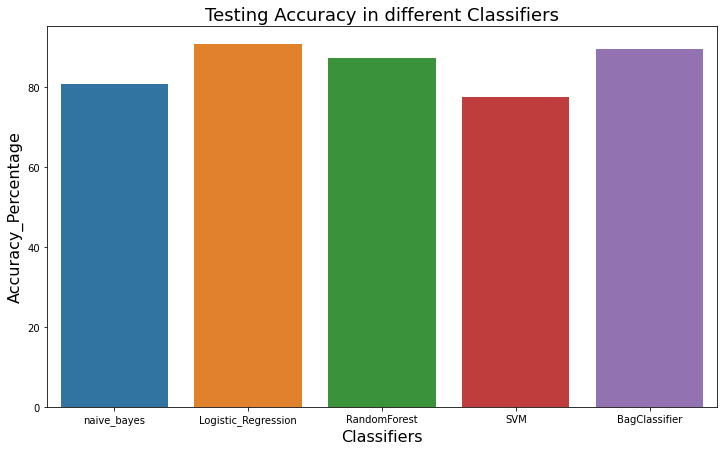

'Logistic Regression is best for Testing'

In [84]:
plt.figure(figsize=(12,7))
sns.barplot(x = 'Classifier', y = 'Accuracy_Percentage',data = Testing_Rat_Accuracy )
plt.title("Testing Accuracy in different Classifiers", size=18)
plt.xlabel('Classifiers',fontdict={'size': 16})
plt.ylabel('Accuracy_Percentage',fontdict={'size': 16})
plt.show()
"""Logistic Regression is best for Testing"""

### logistic regression model has provided the best accuracy result on the dataset

##                                              Tensorflow

In [85]:
def Sentiment_n(x):
    if x=='positive':
        return 1
    else:
        return 0
s=data_f['Rating_Sentiment']
d=list(map(Sentiment_n,s))
data_f['Rt_sentiment_n']=d

data_f.head()

data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10420 entries, 1 to 16636
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             10420 non-null  object 
 1   Reviews           10420 non-null  object 
 2   Ratings           10420 non-null  object 
 3   stars             10420 non-null  int64  
 4   Rating_Sentiment  10420 non-null  object 
 5   scores            10420 non-null  object 
 6   compound          10420 non-null  float64
 7   Review_Sentiment  10420 non-null  object 
 8   pre_reviews       10420 non-null  object 
 9   Rv_sentiment_n    10420 non-null  int64  
 10  Rt_sentiment_n    10420 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.2+ MB


In [86]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")
import tensorflow as tf

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

split = round(len(data_f)*0.8)
train_reviews = data_f['Reviews'][:split]
train_label = data_f['Rt_sentiment_n'][:split]
test_reviews = data_f['Reviews'][split:]
test_label = data_f['Rt_sentiment_n'][split:]

###       20 epcohs considered

In [87]:
import numpy as np
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,       input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels_final))



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           640000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 640,109
Trainable params: 640,109
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
261/261 [==============================] - 1s 2ms/step - loss: 0.6761 - accuracy: 0.6150 - val_loss: 0.6684 - val_accuracy: 0.5773
Epoch 2/20
261/261 [==============================] - 0s 2ms/step - loss: 0.6132 - accuracy: 0.6566 - va

'Training Accuracy = 96.21%  Testing Accuracy = 89.20% '

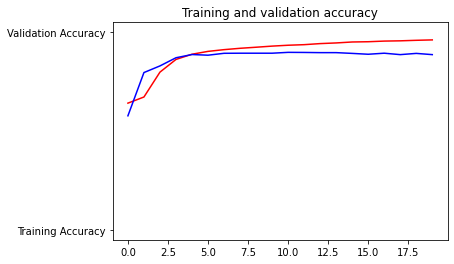

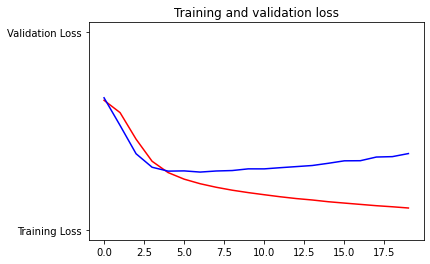

<Figure size 432x288 with 0 Axes>

In [88]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

"""Training Accuracy = 96.21%  Testing Accuracy = 89.20% """




###                                        Tensor flow accuracy

####                   Training Accuracy = 96.21%    Testing Accuracy = 89.20%

#                                         Conclusion

  ***(a) Best phone brand and month for purchase have been analysed.***
  
  ***(b) Testing accuracy and trainig accuracy for various models have been obtained.*** 
  
  ***(c) Sentiment analysis for both Reviews and ratings has been carried out.***
  
  ***(d) Use of all important libraries in execution of the project has been made.*** 